###  Covid 19 Analysis for states in the south-east
### 1. What ethnic groups contain the most positive tests in each state?
### 2. What percentage of positive tests in each ethnic group in each state resulted in death?
### 3. Which ethnic group had the most COVID testing?
### Programmers: Carline Philippe, Manar, Burnetta Wood, Keishauna and Spencer
### Data taken from covidtraking.com



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read COVID-19 data file
covid19data_path = "Resources/CRDTData.csv"
covid19_initial_results_main = pd.read_csv(covid19data_path)

#Make a copy of Original DataFame
covid19_initial_results = covid19_initial_results_main.copy()
covid19_initial_results

,Date,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,...,Tests_Latinx,Tests_Asian,Tests_AIAN,Tests_NHPI,Tests_Multiracial,Tests_Other,Tests_Unknown,Tests_Ethnicity_Hispanic,Tests_Ethnicity_NonHispanic,Tests_Ethnicity_Unknown
0,20210307,AK,59332.0,18300.0,1499.0,NaN,2447.0,12238.0,1508.0,4453.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210307,AL,499819.0,160347.0,82790.0,NaN,2273.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20210307,AR,324818.0,207596.0,50842.0,NaN,2913.0,1070.0,3358.0,1804.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20210307,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210307,AZ,826454.0,308453.0,25775.0,244539.0,11921.0,40707.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,20200412,VT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5316,20200412,WA,10411.0,2903.0,289.0,1180.0,451.0,41.0,61.0,112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5317,20200412,WI,3341.0,1680.0,857.0,NaN,81.0,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5318,20200412,WV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid19_initial_results.count

In [11]:
#get the total of all cases
covid_case_totals = covid19_initial_results.groupby(['State']).sum()[['Cases_Total', 'Cases_White', 'Cases_Black',
                                                              'Cases_Latinx', 'Cases_Asian', 'Cases_AIAN',
                                                              'Cases_NHPI', 'Cases_Multiracial', 'Cases_Other', 'Cases_Unknown']]

covid_case_totals

,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown
State,,,,,,,,,,
AK,1855334.0,574849.0,56782.0,0.0,73005.0,373509.0,54235.0,127827.0,195309.0,404626.0
AL,17861341.0,5601494.0,3373720.0,0.0,70420.0,0.0,0.0,0.0,1414517.0,7370988.0
AR,10837342.0,6652666.0,1890196.0,0.0,105929.0,31859.0,195756.0,61984.0,634159.0,1238177.0
AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZ,27502303.0,8458144.0,815793.0,7948222.0,332233.0,1458070.0,0.0,0.0,1195855.0,7302572.0
CA,109298533.0,15360536.0,3408823.0,45115829.0,5045971.0,241503.0,448957.0,1022184.0,9186953.0,29593580.0
CO,14207740.0,5434639.0,442188.0,4240763.0,215912.0,78689.0,43628.0,195066.0,115981.0,3416883.0
CT,9624669.0,3014522.0,863290.0,1609229.0,113144.0,12023.0,0.0,308684.0,334303.0,3364985.0
DC,1737077.0,401729.0,836556.0,0.0,31478.0,3842.0,4157.0,3825.0,417438.0,30812.0


In [44]:


#covid_case_totals_positive = covid19_initial_results.reset_index()

#Calculate covid positive in the South East States
covid_case_totals_positive = covid19_initial_results.loc[(covid19_initial_results['State'] == 'NC') |
                                                          (covid19_initial_results['State'] == 'SC') |
                                                          (covid19_initial_results['State'] == 'GA') |
                                                          (covid19_initial_results['State'] == 'VA') |
                                                          (covid19_initial_results['State'] == 'AL') |
                                                          (covid19_initial_results['State'] == 'AR') |
                                                          (covid19_initial_results['State'] == 'FL') |
                                                          (covid19_initial_results['State'] == 'KY') |
                                                          (covid19_initial_results['State'] == 'TN') |
                                                          (covid19_initial_results['State'] == 'WV') |
                                                          (covid19_initial_results['State'] == 'MS') |
                                                          (covid19_initial_results['State'] == 'LA')]


#create list of columns to remove
remove_col = ['Tests_White', 'Tests_Black', 'Tests_Latinx',
             'Tests_Asian']

#count the number of records each category
se_cases_total = covid_case_totals_positive.count()
se_cases_total = se_cases_total.drop(['Tests_Total', 'Tests_Latinx','Tests_Asian', 'Tests_NHPI',
                                      'Tests_Multiracial', 'Tests_Other','Tests_Unknown',
                                      'Tests_Ethnicity_Hispanic', 'Tests_Ethnicity_NonHispanic',
                                      'Tests_Ethnicity_Unknown', 'Tests_White', 'Tests_Black',
                                      'Tests_AIAN'])
se_cases_total

Date                            1140
State                           1140
Cases_Total                     1126
Cases_White                     1105
Cases_Black                     1104
Cases_Latinx                     354
Cases_Asian                      890
Cases_AIAN                       690
Cases_NHPI                       489
Cases_Multiracial                247
Cases_Other                     1010
Cases_Unknown                   1123
Cases_Ethnicity_Hispanic         926
Cases_Ethnicity_NonHispanic      926
Cases_Ethnicity_Unknown         1014
Deaths_Total                    1114
Deaths_White                    1114
Deaths_Black                    1114
Deaths_Latinx                    346
Deaths_Asian                     900
Deaths_AIAN                      652
Deaths_NHPI                      442
Deaths_Multiracial               228
Deaths_Other                     971
Deaths_Unknown                  1097
Deaths_Ethnicity_Hispanic        996
Deaths_Ethnicity_NonHispanic     996
D

In [45]:
#clean data - drop the empty columns
#covid_case_totals_positive.count()
#df.dropna(axis='columns')

#se_cases_total.resetindex()
se_cases_total


Date                            1140
State                           1140
Cases_Total                     1126
Cases_White                     1105
Cases_Black                     1104
Cases_Latinx                     354
Cases_Asian                      890
Cases_AIAN                       690
Cases_NHPI                       489
Cases_Multiracial                247
Cases_Other                     1010
Cases_Unknown                   1123
Cases_Ethnicity_Hispanic         926
Cases_Ethnicity_NonHispanic      926
Cases_Ethnicity_Unknown         1014
Deaths_Total                    1114
Deaths_White                    1114
Deaths_Black                    1114
Deaths_Latinx                    346
Deaths_Asian                     900
Deaths_AIAN                      652
Deaths_NHPI                      442
Deaths_Multiracial               228
Deaths_Other                     971
Deaths_Unknown                  1097
Deaths_Ethnicity_Hispanic        996
Deaths_Ethnicity_NonHispanic     996
D

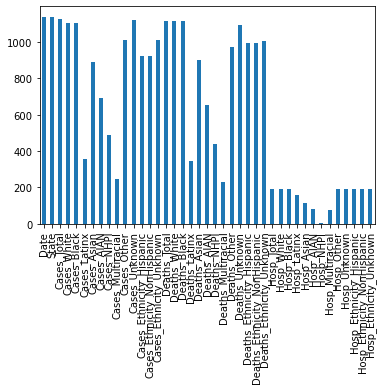

In [46]:
se_cases_total.plot(kind='bar')
plt.show()

In [40]:
# se_states = ['Alabama','Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana','Mississippi','North Carolina','South Carolina','Tennessee','Virginia','West Virginia']

# se_states_data = []

        
# for x in se_states:
#    # print(x)
    
#     if covid19_initial_results.loc[(covid19_initial_results['State'] == x),:] not null:
#         se_states_data.append(covid19_initial_results.loc[(covid19_initial_results['State'] == x),:] )
# se_states_data


In [44]:
covid_case_totals.reset_index()

,State,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown
0,AK,1855334.0,574849.0,56782.0,0.0,73005.0,373509.0,54235.0,127827.0,195309.0,404626.0
1,AL,17861341.0,5601494.0,3373720.0,0.0,70420.0,0.0,0.0,0.0,1414517.0,7370988.0
2,AR,10837342.0,6652666.0,1890196.0,0.0,105929.0,31859.0,195756.0,61984.0,634159.0,1238177.0
3,AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AZ,27502303.0,8458144.0,815793.0,7948222.0,332233.0,1458070.0,0.0,0.0,1195855.0,7302572.0
5,CA,109298533.0,15360536.0,3408823.0,45115829.0,5045971.0,241503.0,448957.0,1022184.0,9186953.0,29593580.0
6,CO,14207740.0,5434639.0,442188.0,4240763.0,215912.0,78689.0,43628.0,195066.0,115981.0,3416883.0
7,CT,9624669.0,3014522.0,863290.0,1609229.0,113144.0,12023.0,0.0,308684.0,334303.0,3364985.0
8,DC,1737077.0,401729.0,836556.0,0.0,31478.0,3842.0,4157.0,3825.0,417438.0,30812.0
9,DE,2932592.0,1258285.0,695688.0,570469.0,52169.0,0.0,0.0,719.0,161604.0,184353.0


In [49]:
se_list = ['NC', 'SC']

covid_case_totals_se = covid_case_totals.isin(se_list)
covid_case_totals_se

,Cases_Total,Cases_White,Cases_Black,Cases_Latinx,Cases_Asian,Cases_AIAN,Cases_NHPI,Cases_Multiracial,Cases_Other,Cases_Unknown
State,,,,,,,,,,
AK,False,False,False,False,False,False,False,False,False,False
AL,False,False,False,False,False,False,False,False,False,False
AR,False,False,False,False,False,False,False,False,False,False
AS,False,False,False,False,False,False,False,False,False,False
AZ,False,False,False,False,False,False,False,False,False,False
CA,False,False,False,False,False,False,False,False,False,False
CO,False,False,False,False,False,False,False,False,False,False
CT,False,False,False,False,False,False,False,False,False,False
DC,False,False,False,False,False,False,False,False,False,False
